<a href="https://colab.research.google.com/github/sergiokv13/03MAIR-Algoritmos-de-Optimizacion/blob/master/Algoritmos_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Optimizacion - Actividad Guiada 2

<strong>Nombre:</strong> Sergio Andres Köller Vargas <br>
<strong>URL:</strong> https://colab.research.google.com/drive/13bzJ8-4eTdDYm8Di-eLIqNAfwm8tFphg?usp=sharing <br>
<strong>Github:</strong> https://github.com/sergiokv13/03MAIR-Algoritmos-de-Optimizacion/blob/master/AG1/Algoritmos_AG2.ipynb

In [34]:
import math
import itertools
import matplotlib.pyplot as plt
import numpy as np
import random
from time import time

## Viaje por el rio

In [35]:
tarifas = [
  [0,5,4,3,999,999,999], # desde nodo 0
  [999,0,999,2,3,999,11], # desde nodo 1
  [999,999,0,1,999,4,10],
  [999,999,999,0,5,6,9],
  [999,999,999,999,0,999,4],
  [999,999,999,999,999,0,3],
  [999,999,999,999,999,999,0]
]

In [36]:
def precios(tarifas):
  # Numero de nodos
  n = len(tarifas[0])

  # Inicializacion de la tabla de precios
  precios = [[9999] * n for i in [9999]*n]
  ruta = [[""]*n for i in [""]*n]

  for i in range(n-1):
    for j in range(i+1, n):
      local_min = tarifas[i][j]
      ruta[i][j] = i

      for k in range(i,j):
        if precios[i][k] + tarifas[k][j] < local_min:
          local_min = min(local_min, precios[i][k] + tarifas[k][j])
          ruta[i][j] = k
        precios[i][j] = local_min

  return precios, ruta

def calcular_ruta(ruta, desde, hasta):
  if desde == hasta:
    return desde
  else:
    return str(calcular_ruta(ruta, desde, ruta[desde][hasta])) + ',' + str(hasta)

precios, ruta = precios(tarifas)

print(f"La ruta es: {calcular_ruta(ruta, 0, 6)}")

La ruta es: 0,2,5,6


## Ramificación y poda

In [37]:
costes = [[11,12,18,40],
          [14,15,13,22],
          [11,17,19,23],
          [17,14,20,28]]

In [38]:
 def get_valor(s,costes):
  valor = 0
  for i in range(len(s)):
    valor += costes[i][s[i]]
  return valor

# valor((0,1,2,3), costes)
get_valor((0,1,2,3), costes)

73

#### Solución Fuerza Bruta

In [39]:
def fuerza_bruta(costes):
  mejor_val = 10e10
  mejor_sol = ()

  for s in list(itertools.permutations(range(len(costes)))):
    valor_tmp = get_valor(s, costes)
    if valor_tmp < mejor_val:
      mejor_val = valor_tmp
      mejor_sol = s

  print("La mejor solución es : ", mejor_sol, "con valor: ", mejor_val)

#### Solución Ramificación y Poda

```
# This is formatted as code
```



In [40]:
def ci(s, costes):
  valor = get_valor(s, costes)

  for i in range(len(s), len(costes)):
    valor += min([ costes[j][i] for j in range(len(s), len(costes))])
  return valor
print(ci((0,1), costes))

68


In [41]:
def crear_hijos(nodo, n):
  hijos = []
  for i in range(n):
    if i not in nodo:
      hijos.append({'s': nodo + (i,)})
  return hijos

In [42]:
def ramificacion_y_poda(costes):
  dimension = len(costes)
  mejor_sol = tuple(i for i in range(len(costes)))
  cota_sup = get_valor(mejor_sol, costes)

  nodos = []
  nodos.append({'s': (), 'ci': ci((), costes)})

  iteracion = 0
  
  while(len(nodos) > 0):
    iteracion += 1
    nodo_prometedor = min(nodos, key=lambda x:x['ci'])['s']

    hijos = [{'s': x['s'], 'ci': ci(x['s'], costes) } for x in crear_hijos(nodo_prometedor, dimension)]

    # si encontramos solucion con ci < cs y que sea final entonces es mejor solucion local
    nodo_final = [x for x in hijos if len(x['s']) == dimension]
    if (len(nodo_final) > 0):
      if nodo_final[0]['ci'] < cota_sup:
        cota_sup = nodo_final[0]['ci']
        mejor_sol = nodo_final

    # poda
    hijos = [x for x in hijos  if x['ci'] < cota_sup]

    nodos.extend(hijos)

    # Eliminamos el nodo recientemente explorado (se podria tambien hacer con un pop)
    nodos = [x for x in nodos if x["s"] != nodo_prometedor]

  print("La solución final es: ", mejor_sol, " en ", iteracion , "iteraciones para dimension: ", dimension)

In [43]:
print("Ramificacion y poda")
ramificacion_y_poda(costes)
print("Fuerza bruta")
fuerza_bruta(costes)

Ramificacion y poda
La solución final es:  [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10 iteraciones para dimension:  4
Fuerza bruta
La mejor solución es :  (0, 2, 3, 1) con valor:  61


## Descenso del gradiente

In [92]:
def descenso_del_gradiente(f, df, it = 500):
  # Preparado de datos para dibujar mapa de niveles de Z
  resolucion = 100
  rango = 2.5
  X = np.linspace(-rango, rango, resolucion)
  Y = np.linspace(-rango, rango, resolucion)
  Z = np.zeros((resolucion, resolucion))
  for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
      Z[ix, iy] = f([x,y])

  # pinta el mapa de niveles de z
  plt.contourf(X,Y,Z, resolucion)
  plt.colorbar()

  # Generatmos un punto aleatorio
  p = [random.uniform(-2,2), random.uniform(-2,2)]
  plt.plot(p[0], p[1], "o", c="white")

  # tasa de aprendizaje
  ta=.1
  #iteraciones
  for _ in range(it):
    grad = df(p)
    p[0], p[1] = p[0] - ta*grad[0], p[1] - ta*grad[1]
    plt.plot(p[0],p[1],"o", c="red")
  
  print(p)

[2.7903750001880842e-49, -6.648636029742883e-49]


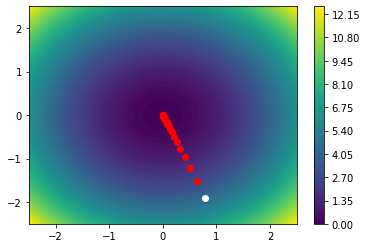

In [93]:
f = lambda x: x[0]**2 + x[1]**2  # Función
df = lambda x:[2*x[0], 2*x[1]] # Gradiente

descenso_del_gradiente(f,df)

### Tarea Ramificación y Poda

1. La complejidad de nuestro algoritmo de fuerza bruta (Implementado previamente en el punto de ramificación y poda) es de n!, donde n es la cantidad de tareas/agentes que tenemos. Esto es debido a que estamos revisando todas las posibilidades de asignación de tareas.

2. Verificación con matrices mas grandes para fuerza bruta y ramificación y poda. A partir de que punto dejan de ser opciones viables?

In [55]:
# Matrices de prueba
matrices_prueba = []
for i in range(0, 20):
  matrices_prueba.append(np.random.randint(0,100, (i,i)))

# Prueba Fuerza bruta
for i in range(0, 11):
  start = time()
  random_costes = matrices_prueba[i]
  fuerza_bruta(random_costes)
  end = time() - start
  print(f"Para una matriz de tamaño {i} el tiempo es: {end} ")

La mejor solución es :  () con valor:  0
Para una matriz de tamaño 0 el tiempo es: 0.0008654594421386719 
La mejor solución es :  (0,) con valor:  98
Para una matriz de tamaño 1 el tiempo es: 0.0003159046173095703 
La mejor solución es :  (0, 1) con valor:  75
Para una matriz de tamaño 2 el tiempo es: 0.0003190040588378906 
La mejor solución es :  (1, 2, 0) con valor:  81
Para una matriz de tamaño 3 el tiempo es: 0.0003173351287841797 
La mejor solución es :  (0, 3, 1, 2) con valor:  102
Para una matriz de tamaño 4 el tiempo es: 0.00045871734619140625 
La mejor solución es :  (0, 2, 3, 1, 4) con valor:  127
Para una matriz de tamaño 5 el tiempo es: 0.0006263256072998047 
La mejor solución es :  (0, 4, 2, 3, 5, 1) con valor:  151
Para una matriz de tamaño 6 el tiempo es: 0.0025358200073242188 
La mejor solución es :  (2, 1, 4, 6, 0, 3, 5) con valor:  134
Para una matriz de tamaño 7 el tiempo es: 0.02222919464111328 
La mejor solución es :  (2, 7, 6, 1, 3, 0, 4, 5) con valor:  119
Para u

Se realizarón un par de pruebas notando el crecimiento de tiempo. Una matriz de tamaño 10 ya necesita un tiempo significativo de aproximadamente 17 segundos, lo cual corresponde a 3M de operaciones aproximadamente. El aumentarle una dimensión mas incrementaria el numero de operaciones a 39M aprox, lo cual requeriria mucho mas tiempo de computo y el mismo espacio de almacenamiento. Es interesante mencionar tambien que la sesión termino abruptamente por el exceso de uso de Ram al tratar de correr la matriz de tamaño 11. Realmente este algoritmo no es una opcion para dimensiones mayores a 10.

In [56]:
# Prueba Ramificación y Poda
for i in range(0, 13):
  start = time()
  random_costes = matrices_prueba[i]
  ramificacion_y_poda(random_costes)
  end = time() - start
  print(f"Para una matriz de tamaño {i} el tiempo es: {end} ")

La solución final es:  ()  en  1 iteraciones para dimension:  0
Para una matriz de tamaño 0 el tiempo es: 0.0009713172912597656 
La solución final es:  (0,)  en  1 iteraciones para dimension:  1
Para una matriz de tamaño 1 el tiempo es: 0.0013551712036132812 
La solución final es:  (0, 1)  en  1 iteraciones para dimension:  2
Para una matriz de tamaño 2 el tiempo es: 0.0010187625885009766 
La solución final es:  [{'s': (1, 2, 0), 'ci': 81}]  en  6 iteraciones para dimension:  3
Para una matriz de tamaño 3 el tiempo es: 0.0007016658782958984 
La solución final es:  [{'s': (0, 3, 1, 2), 'ci': 102}]  en  34 iteraciones para dimension:  4
Para una matriz de tamaño 4 el tiempo es: 0.0008461475372314453 
La solución final es:  [{'s': (0, 2, 3, 1, 4), 'ci': 127}]  en  48 iteraciones para dimension:  5
Para una matriz de tamaño 5 el tiempo es: 0.0015850067138671875 
La solución final es:  [{'s': (0, 5, 2, 1, 3, 4), 'ci': 151}]  en  70 iteraciones para dimension:  6
Para una matriz de tamaño 6 

Al utilizar el algoritmo de ramificación y poda un par de veces(con diferentes matrices iniciales) se noto que una dimensión de 13 ya empieza a traernos problemas, logrando soluciones para una dimensión de 12 en aprox 44 segundos (varia dependiendo de la matriz de costes). Es interesante apreciar tambien que los tiempos estan muy ligados a las matrices de costes, pudiendo encontrar a veces soluciones mas rapido para dimensiones mayores. Fuera de no necesitar revisar todos los caminos igual es necesario revisar muchos de los hijos de nuestros nodos, lo cual incrementara la complejidad a medida que crece nuestra matriz de costes.

### Tarea de descenso del gradiente

[2.221400683540284, 1.6205666433120083]


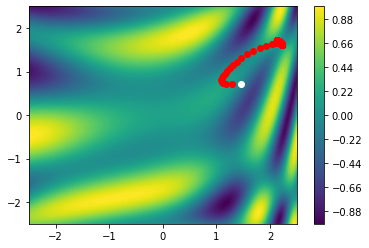

In [110]:
# Aproximación de la derivada en un  punto
def df(f, punto):
  h = 0.01
  t = np.copy(punto)
  grad = np.zeros(2)
  for it, th in enumerate(punto):
    t[it] = t[it] + h
    grad[it] = (f(t) - f(punto)) / h
  
  return grad

f = lambda x: np.sin(1/2 * x[0]**2 - 1/4*x[1]**2 + 3) * np.cos(2*x[0] + 1 - np.e**x[1])
new_df = lambda x:df(f, x)

descenso_del_gradiente(f, new_df,1000)

Podemos ver que nuestro descenso se acerca a minimos locales.